# Livrable 3

# Étape 1 : Initialisation

In [1]:
import matplotlib.pyplot as plt
import numpy, random, math, collections, time


# Initials var
nbCities = 12
nbTrucks = 2
nbWarehouse = 1
nbNodes = nbCities + nbWarehouse

x_size = 100
y_size = 100

maxIteration = 10000
memorySize = int(maxIteration/2)

In [2]:
def generateCoordinate(n):
    # Generate randoms coordinate for nodes with n the number of nodes
    return {n : (random.randint(0, x_size), random.randint(0 , y_size)) for n in range(n)}

def generateNodes():
    return generateCoordinate(nbNodes)

def generateMap(cities):
    # Generate Map graph with generated nodes
    wCoordinate = (cities.get(0)[0], cities.get(0)[1])
    
    for city, coordinate in cities.items():
        if city > 0:
            temp_coord = coordinate
            temp_anno = city
            color = 'k'
        else:
            temp_coord = wCoordinate
            temp_anno = "Warehouse"
            color = 'r'
        
        plt.scatter(temp_coord[0], temp_coord[1], s=150, color=color)
        plt.annotate(temp_anno, tuple(XY + 0.8 for XY in temp_coord))
        
        for nextCity, nextCoordinate in list(cities.items())[city+1:]:
            plt.plot([coordinate[0], nextCoordinate[0]], [coordinate[1], nextCoordinate[1]], c='lightblue')

    plt.gcf().set_size_inches(15, 15)
    plt.show()
    
    
def determineWeight(cities):
    # Create a matrix with the weight between nodes
    pathMatrix = [[0 for i in range(nbNodes)] for j in range(nbNodes)]
    for city, coordinate in cities.items():
        for nextCity, nextCoordinate in list(cities.items())[city+1:]:
            weight = math.sqrt(((nextCoordinate[0] - coordinate[0])**2) + ((nextCoordinate[1] - coordinate[1])**2))
            pathMatrix[city-1][nextCity-1] = weight
            pathMatrix[nextCity-1][city-1] = weight
    
    return pathMatrix

def solutionValue(solution):
    # Calculate the solution value (full weight)
    return sum(edgeWeights[solution[i]][solution[i+1]] for i in range(len(solution) - 1))
                
def search(initSolution, memorySize, maxIteration):
    # Find the best solution that weight less
    nbIteration = 0
    memoryList = collections.deque((), maxlen = memorySize)
    
    bestValueList = collections.deque(()) 
    bestGlobalValueList = collections.deque(()) 
    
    c_solution = initSolution
    bestSolution = initSolution
    bestSolution_global = initSolution
    
    bestValue = solutionValue(c_solution)
    bestValue_global = bestValue
    
    while (nbIteration < maxIteration):
        bestValue += 1
        
        shuffled = c_solution[:2] + tuple(random.sample(c_solution[2:-1], len(c_solution) - 3)) + c_solution[-1:]
        shuffled_value = solutionValue(shuffled)

        if shuffled_value < bestValue and shuffled not in memoryList:
            bestValue = shuffled_value
            bestSolution = shuffled

        if bestValue < bestValue_global:
            bestSolution_global = bestSolution
            bestValue_global = bestValue
            nbIteration = 0
        else:
            nbIteration += 1
            
        bestValueList.append(bestValue)
        bestGlobalValueList.append(bestValue_global)

        c_solution = bestSolution

        memoryList.append(c_solution) 
        
        nbIteration += 1
        
    return bestSolution_global, bestValueList, bestGlobalValueList

In [3]:
def generatePath(solution, cities):
    # Show the optimized path on a graph
    wCoordinate = (cities.get(0)[0], cities.get(0)[1])
    
    for i in range(len(solution) - 1):
        node = solution[i]
        nextNode = solution[i+1]
        
        plt.scatter(cities.get(node)[0], cities.get(node)[1], s=150, color="k")
        plt.plot([cities.get(node)[0], cities.get(nextNode)[0]], [cities.get(node)[1], cities.get(nextNode)[1]], c='red')
        plt.annotate(node, tuple(XY + 0.8 for XY in cities.get(node)))

    plt.gcf().set_size_inches(15, 15)
    plt.show()
    
def generatePathTrucks(solution, cities, path, nbTrucks):
    # Show the optimized path on a graph if we have trucks
    wCoordinate = (cities.get(0)[0], cities.get(0)[1])
    totalPath = 0
    numberOfTruck = 1
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
#     color = 0 
    
    for i in range(len(solution) - 1):
        if (i==0): 
            plt.scatter(cities.get(solution[0])[0], cities.get(solution[0])[1], s=150, color='k')
            plt.annotate(solution[0], tuple(XY + 0.8 for XY in cities.get(solution[0])))
            plt.plot([cities.get(solution[0])[0], cities.get(solution[1])[0]], [cities.get(solution[0])[1], cities.get(solution[1])[1]], c='black')
        else : 
            node = solution[i]
            nextNode = solution[i+1]
            
            if (totalPath == 0):
                plt.plot([cities.get(node)[0], cities.get(solution[1])[0]], [cities.get(node)[1], cities.get(solution[1])[1]], c=color)

            totalPath += distance(cities.get(node)[0],cities.get(node)[1],cities.get(nextNode)[0],cities.get(nextNode)[1])

            if (totalPath < path):
                plt.scatter(cities.get(node)[0], cities.get(node)[1], s=150, color="k")
                plt.plot([cities.get(node)[0], cities.get(nextNode)[0]], [cities.get(node)[1], cities.get(nextNode)[1]], c=color)
                plt.annotate(node, tuple(XY + 0.8 for XY in cities.get(node)))
            else:
                print("Path ", numberOfTruck, " : ", totalPath)
                totalPath = 0
                plt.scatter(cities.get(node)[0], cities.get(node)[1], s=150, color="k")
                plt.annotate(node, tuple(XY + 0.8 for XY in cities.get(node)))
                plt.plot([cities.get(node)[0], cities.get(solution[0])[0]], [cities.get(node)[1], cities.get(solution[0])[1]], c=color)

                if (numberOfTruck!=nbTrucks):
                    numberOfTruck += 1 
                    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                     nameColor = color
#                     color += 1         
                
    plt.plot([cities.get(solution[-1])[0], cities.get(solution[0])[0]], [cities.get(solution[-1])[1], cities.get(solution[0])[1]], c=color)
    plt.gcf().set_size_inches(15, 15)
    plt.show()

def pathByTrucks(bestSolution, nbTrucks):
    return (bestSolution/nbTrucks)

def distance(x1,y1,x2,y2):
     return math.sqrt((x1-x2)**2+(y1-y2)**2)


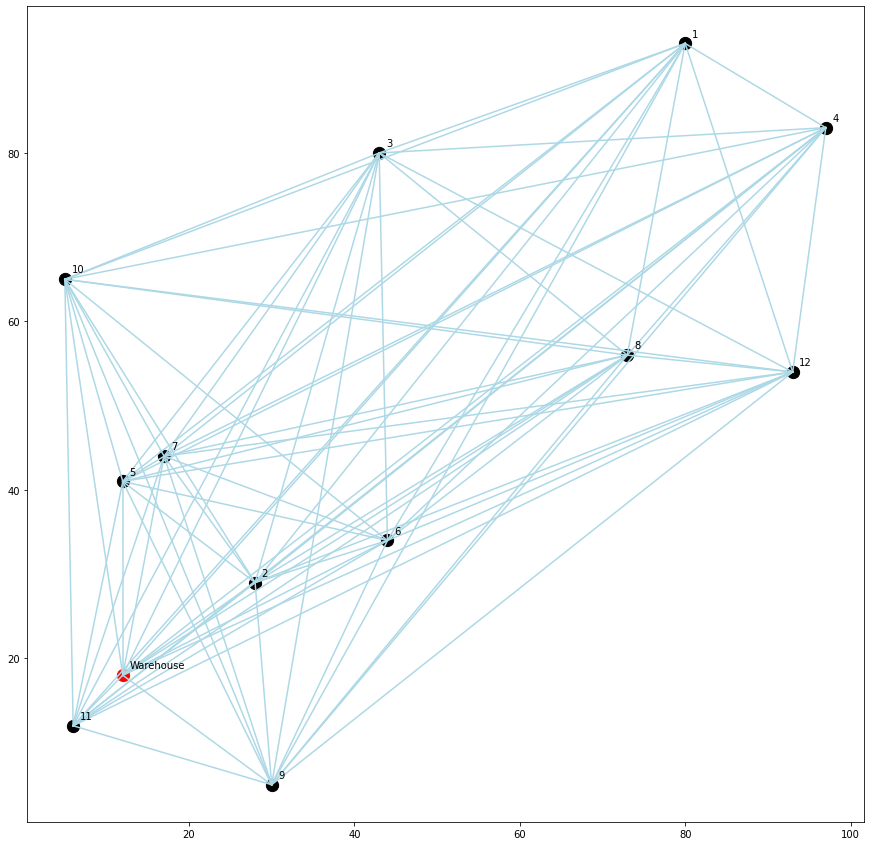

464.40762774271104


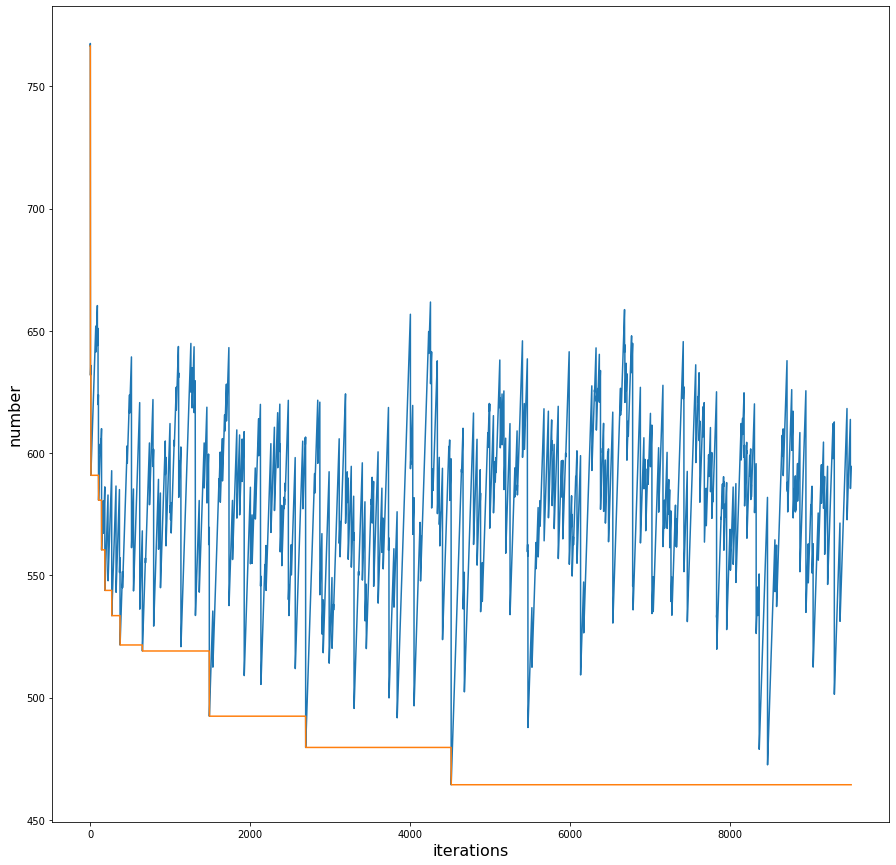

Path  1  :  236.94404873972528
Path  2  :  307.3002114882385


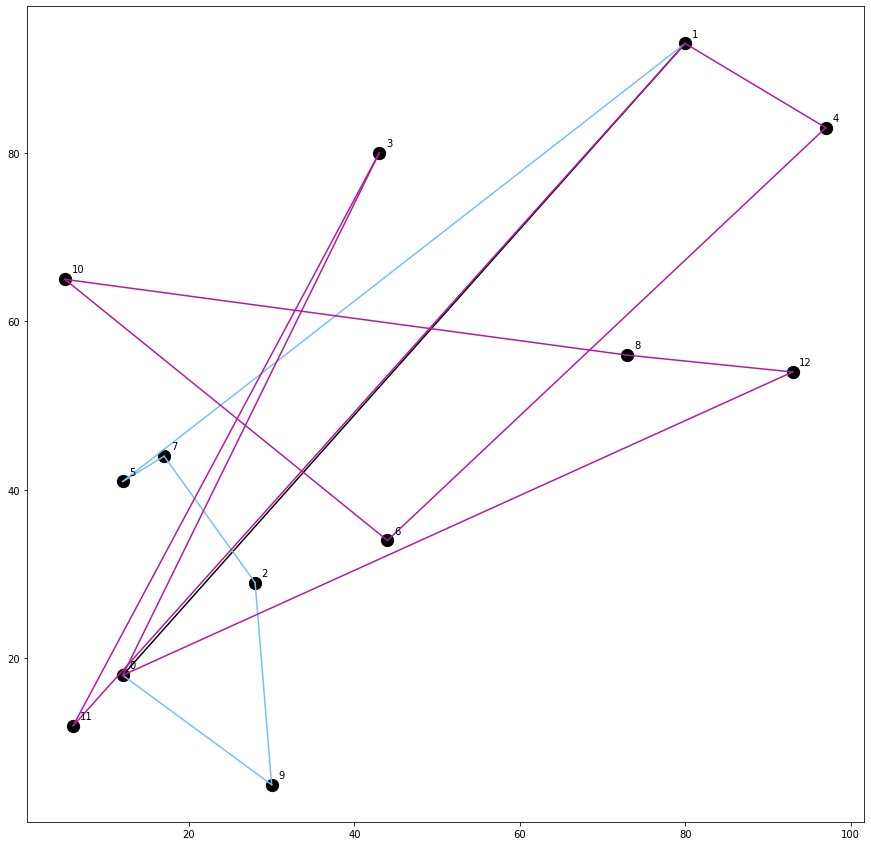

(0, 1, 5, 7, 2, 9, 4, 6, 10, 8, 12, 11, 3, 0)
temps :  0.921875 s


In [4]:
start = time.process_time() # Time process
nodes = generateNodes()
generateMap(nodes)
edgeWeights = determineWeight(nodes)
initSolution = tuple(i for i in range(nbNodes)) + (0,)

sol, bestValueList, bestGlobalValueList = search(initSolution, memorySize, maxIteration)

bestSolution = bestGlobalValueList[-1]
print(bestSolution)

plt.xlabel("iterations", fontsize=16)
plt.ylabel("number", fontsize=16)
plt.plot(range(len(bestValueList)), bestValueList) 
plt.plot(range(len(bestGlobalValueList)), bestGlobalValueList) 
plt.gcf().set_size_inches(15, 15)
plt.show()

stop = time.process_time()

if (nbTrucks!=0):
    path = pathByTrucks(bestSolution, nbTrucks)
    generatePathTrucks(sol, nodes, path, nbTrucks)

print(sol)
print("temps : ", stop-start, 's')

# generatePath(sol, nodes)